Importing Libraries

In [95]:
import requests
from bs4 import BeautifulSoup

Setting the URL of the website

In [96]:
url = 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2'

Making a 'request' to the server and extracting the raw HTML

In [97]:
page = requests.get(url)

#page.content  will reveal the raw html that renders the webpage
print(page.content)

b'\r\n\r\n<!doctype html>\r\n<html id="ctl00_html" lang="en" class=" wide roster-page sport mvolley"> \r\n    <head><script data-cfasync=\'false\' src=\'https://cdn.transcend.io/cm/30fbff84-b0e3-4e26-9084-0b5158fdb1ed/airgap.js\'></script><script>window.client_hostname = "athletics.baruch.cuny.edu";window.client_title = "Baruch College";window.server_name = "1275314-APP89";window.client_division = "DIII";window.targetting_criteria = {"page_template":"roster-list","sport_name":"mvball","sport_name_custom":"mvolley","site":"baruch","cbs_site_code":"baru","content_id":null,"sect":"mvolley"};window.client_shortname = "baruch";window.dfp_network_code = "21708449227";window.img_dfp_unit_name = "";window.ad_full_unit_name = "SAExtended/baruch";window.block_dfp = false;window.reactions = null;window.cbs_ads_activated = true;window.site_colors = {"safe_text_white":"#000000","safe_text_black":"#ffffff","primary_background":"#004b8d","primary_text":"#ffffff","secondary_background":"#8bb8ea","seco

In the above cell, we can see that the raw HTML is difficult to read. BeautifulSoup has several useful methods to extract data from the raw HTML.

In [98]:
#importing the raw html into BeautifulSoup and telling it that we are parsing HTML
soup = BeautifulSoup(page.content, 'html.parser')

.prettify()  is a BeautifulSoup method that displays the HTML in an easy to read manner.

In [99]:
print(soup.prettify())

<!DOCTYPE html>
<html class="wide roster-page sport mvolley" id="ctl00_html" lang="en">
 <head>
  <script data-cfasync="false" src="https://cdn.transcend.io/cm/30fbff84-b0e3-4e26-9084-0b5158fdb1ed/airgap.js">
  </script>
  <script>
   window.client_hostname = "athletics.baruch.cuny.edu";window.client_title = "Baruch College";window.server_name = "1275314-APP89";window.client_division = "DIII";window.targetting_criteria = {"page_template":"roster-list","sport_name":"mvball","sport_name_custom":"mvolley","site":"baruch","cbs_site_code":"baru","content_id":null,"sect":"mvolley"};window.client_shortname = "baruch";window.dfp_network_code = "21708449227";window.img_dfp_unit_name = "";window.ad_full_unit_name = "SAExtended/baruch";window.block_dfp = false;window.reactions = null;window.cbs_ads_activated = true;window.site_colors = {"safe_text_white":"#000000","safe_text_black":"#ffffff","primary_background":"#004b8d","primary_text":"#ffffff","secondary_background":"#8bb8ea","secondary_text":

The height for each player is located in the <td> tags. However, all of these tags have class called 'height'. For example, see below:

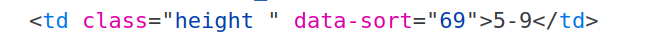



The *.find_all('name of tag', id = 'name of id')* method can be used to find a single tag with a certain id.

Similarly, the *.find_all('name of tag', class_ = 'name of class')* method can be used to find all instances of an individual tag with a certain class.

In [100]:
#finding all of the td tags with a class of 'height
td_tags = soup.find_all('td', class_ ='height')

td_tags is a list containing all of the td tags from the website's html code. We need to extract the data from each of these tags.

In [101]:
td_tags

[<td class="height" data-sort="69">5-9</td>,
 <td class="height" data-sort="75">6-3</td>,
 <td class="height" data-sort="75">6-3</td>,
 <td class="height" data-sort="67">5-7</td>,
 <td class="height" data-sort="73">6-1</td>,
 <td class="height" data-sort="70">5-10</td>,
 <td class="height" data-sort="72">6-0</td>,
 <td class="height" data-sort="72">6-0</td>,
 <td class="height" data-sort="69">5-9</td>,
 <td class="height" data-sort="76">6-4</td>,
 <td class="height" data-sort="73">6-1</td>,
 <td class="height" data-sort="76">6-4</td>,
 <td class="height" data-sort="77">6-5</td>,
 <td class="height" data-sort="71">5-11</td>,
 <td class="height" data-sort="74">6-2</td>,
 <td class="height" data-sort="65">5-5</td>,
 <td class="height" data-sort="68">5-8</td>,
 <td class="height" data-sort="79">6-7</td>,
 <td class="height" data-sort="76">6-4</td>]

Index 0 will output the first tag in the td_tags list:


In [102]:
td_tags[0]

<td class="height" data-sort="69">5-9</td>

Using the *.get_text()* method will extract the data from the tag. For example:


In [103]:
td_tags[0].get_text()

'5-9'

We need to extract the data from all of the tags in the list. A for loop can solve this problem.

In [104]:
for tag in td_tags:
  print(tag.get_text())

5-9
6-3
6-3
5-7
6-1
5-10
6-0
6-0
5-9
6-4
6-1
6-4
6-5
5-11
6-2
5-5
5-8
6-7
6-4


How can we find the average height?
First, we need to convert the heights to a common unit. Let's use inches. We will extract the feet and inches from each person's height. Thereafter, we will multiply the feet by 12 and add it to the inches to get the person's overall height in inches.

Let's try this idea with the first athlete in the list.

In [105]:
raw_height = td_tags[0].get_text()
print(raw_height)

5-9


We will split the above string based on the '-'. This will create a list of two elements. The first element will be the feet value and the second element will be the inches.

In [106]:
raw_height_list = raw_height.split('-')
print(raw_height_list)

['5', '9']


Extracting the feet and inches from the list:

In [107]:
feet = raw_height_list[0]
inches = raw_height_list[1]

print(f'feet: {feet} inches: {inches}')

feet: 5 inches: 9


The next step is to convert the feet to inches.

In [108]:
feet = feet * 12

print(feet)

555555555555


😦 -> the above process fails because it duplicates the value stored in the feet by 12. That is, the data in feet is stored as a string. We need to go back a few steps and convert the scraped data to float or int data types.

Enclosing the variables with float() will convert the value from string to float. Noted the decimal point now appears when we print the data.

In [109]:
feet = float(raw_height_list[0])
inches = float(raw_height_list[1])

print(f'feet: {feet} inches: {inches}')

feet: 5.0 inches: 9.0


Now..let's convert the feet to inches

In [110]:
feet_in_inches = feet * 12

print(feet_in_inches)

60.0


Then..we need to add that value to inches

In [111]:
overall_height_inches = feet_in_inches + inches
print(overall_height_inches)

69.0


This process needs to be repeated for all athletes. Each section of the above code will be placed in a for loop.

We will create an empty list to store overall_height_inches for all athletes

In [112]:
overall_height_inches_list = []

In [113]:
#In the loop below, 'tag' will represent the individual td tag which contains
#the raw height for a single athlete
for tag in td_tags:

  #extracting the raw height from the html
  raw_height = tag.get_text()
  #splitting the raw height so that the feet and inches will be in single list
  raw_height_list = raw_height.split('-')

  #extracing the feet and inches from the raw_height_list and converting both to float
  feet = float(raw_height_list[0])
  inches = float(raw_height_list[1])

  #converting the feet to inches
  feet_in_inches = feet * 12

  #adding the feet_in_inches to inches
  overall_height_inches = feet_in_inches + inches

  #printing the height in inches for EACH athlete
  print(overall_height_inches)

  #inserting each height into the overall_height_inches_list
  overall_height_inches_list.append(overall_height_inches)





69.0
75.0
75.0
67.0
73.0
70.0
72.0
72.0
69.0
76.0
73.0
76.0
77.0
71.0
74.0
65.0
68.0
79.0
76.0


Let's take a look at the overall_height_inches_list:

In [114]:
overall_height_inches_list

[69.0,
 75.0,
 75.0,
 67.0,
 73.0,
 70.0,
 72.0,
 72.0,
 69.0,
 76.0,
 73.0,
 76.0,
 77.0,
 71.0,
 74.0,
 65.0,
 68.0,
 79.0,
 76.0]

To find the average height:
- we need to find the sum of all heights
- find the total number of athletes (this will be the number of items in the list)
- divide the sum of all heights by the total number of athletes

In [115]:
#the sum() method in python can be used to find the total of all numerical values in a list
total_heights = sum(overall_height_inches_list)

#printing the total of all heights
print(f'total heights: {total_heights}')

total heights: 1377.0


In [116]:
#the len() method can be used to find the number of items in the list
number_of_athletes = len(overall_height_inches_list)

#printing the number of athletes
print(f'number of athletes: {number_of_athletes}')

number of athletes: 19


In [117]:
#finding the average height
avg = total_heights / number_of_athletes

print(f'the average height of a Baruch volleyball player in inches is {avg}')

the average height of a Baruch volleyball player in inches is 72.47368421052632
